In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install openpyxl  # For reading .xlsx files
!pip install pyxlsb

In [3]:
import pandas as pd

# Load my file
file_path = '/kaggle/input/fundingdf/DistrictCostDatabase_2024 (1).xlsb'  
df = pd.read_excel(file_path, engine='pyxlsb')

print(df.head())

   year   leaid          district state_name stabbr  ppcstot  predcost  \
0  2009  100005  ALBERTVILLE CITY    Alabama     AL     8608     12557   
1  2010  100005  ALBERTVILLE CITY    Alabama     AL     8688     12567   
2  2011  100005  ALBERTVILLE CITY    Alabama     AL     8492     11509   
3  2012  100005  ALBERTVILLE CITY    Alabama     AL     8157     15540   
4  2013  100005  ALBERTVILLE CITY    Alabama     AL     8069     14412   

   fundinggap  outcomegap  enroll       pov       iep       ell     amind  \
0       -3949   -0.373566    3849  0.302567  0.009353  0.204729  0.001823   
1       -3879   -0.216288    4104  0.334258  0.074561  0.197856  0.001467   
2       -3017   -0.190391    4143  0.339477  0.063481  0.144340  0.000483   
3       -7383   -0.117687    4140  0.444417  0.075604  0.143720  0.001208   
4       -6343   -0.278603    4422  0.389776  0.071009  0.160271  0.001583   

      asian     black      hisp     multi       pac     white  
0  0.004427  0.022917  0.317

In [ ]:
print(df.dtypes)

In [ ]:
print(df.describe())

In [15]:
print(df.isnull().sum())

year              0
leaid             0
district          0
state_name        0
stabbr            0
ppcstot           0
predcost          0
fundinggap        0
outcomegap    45154
enroll            0
pov               0
iep            4011
ell            1286
amind             0
asian             0
black             0
hisp              0
multi         19668
pac           22171
white             0
Region           13
RegionCode        0
dtype: int64


In [ ]:
#Ask Abi what to do about missing values

In [25]:
# This code creates a function that produces a new column to identify the racial majority of a School District

def majority_minority(row):

  """

  This function will check which racial grouping, White/Asian or Black/Hispanic/American Indian, 

  comprises over 50% of the student population

  """

  # Combine percentages for White/Asian and URM groups

  white_asian_percentage = row['white'] + row['asian']

  minority_percentage = row['black'] + row['hisp'] + row['amind']

  

  if white_asian_percentage > 0.50:

      return "White/Asian Majority"

  elif minority_percentage > 0.50:

      return "URM Majority"

  else:

      return "Mixed"

 

# Run the function to create the new column

df['Majority_Group'] = df.apply(majority_minority, axis=1)
print(df.head())

   year   leaid          district state_name stabbr  ppcstot  predcost  \
0  2009  100005  ALBERTVILLE CITY    Alabama     AL     8608     12557   
1  2010  100005  ALBERTVILLE CITY    Alabama     AL     8688     12567   
2  2011  100005  ALBERTVILLE CITY    Alabama     AL     8492     11509   
3  2012  100005  ALBERTVILLE CITY    Alabama     AL     8157     15540   
4  2013  100005  ALBERTVILLE CITY    Alabama     AL     8069     14412   

   fundinggap  outcomegap  enroll  ...     asian     black      hisp  \
0       -3949   -0.373566    3849  ...  0.004427  0.022917  0.317188   
1       -3879   -0.216288    4104  ...  0.005136  0.022010  0.335534   
2       -3017   -0.190391    4143  ...  0.003138  0.022930  0.351195   
3       -7383   -0.117687    4140  ...  0.002657  0.017874  0.349758   
4       -6343   -0.278603    4422  ...  0.002714  0.017413  0.378109   

      multi       pac     white  Region  RegionCode  cluster  \
0       NaN       NaN  0.653646   South           2       

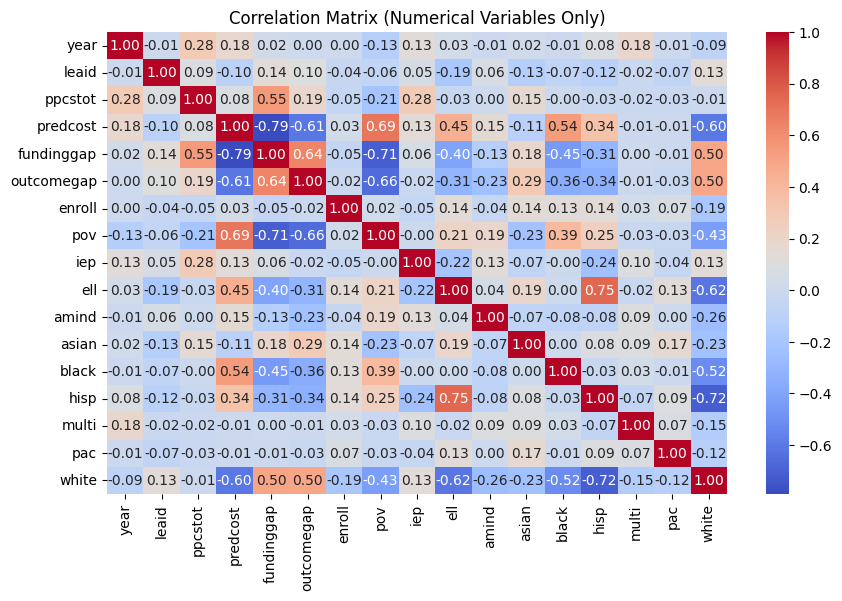

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


numerical_df = df.select_dtypes(include=['float64', 'int64'])
variables_to_remove = ['leaid', 'year'] 

correlation_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Numerical Variables Only)')
plt.show()

In [ ]:
correlation_matrix = numerical_df.corr()
print(correlation_matrix)

In [5]:
state_to_region = {
    'Alabama': 'South',
    'Alaska': 'West',
    'Arizona': 'West',
    'Arkansas': 'South',
    'California': 'West',
    'Colorado': 'West',
    'Connecticut': 'Northeast',
    'Delaware': 'Northeast',
    'Florida': 'South',
    'Georgia': 'South',
    'Hawaii': 'West',
    'Idaho': 'West',
    'Illinois': 'Midwest',
    'Indiana': 'Midwest',
    'Iowa': 'Midwest',
    'Kansas': 'Midwest',
    'Kentucky': 'South',
    'Louisiana': 'South',
    'Maine': 'Northeast',
    'Maryland': 'Northeast',
    'Massachusetts': 'Northeast',
    'Michigan': 'Midwest',
    'Minnesota': 'Midwest',
    'Mississippi': 'South',
    'Missouri': 'Midwest',
    'Montana': 'West',
    'Nebraska': 'Midwest',
    'Nevada': 'West',
    'New Hampshire': 'Northeast',
    'New Jersey': 'Northeast',
    'New Mexico': 'West',
    'New York': 'Northeast',
    'North Carolina': 'South',
    'North Dakota': 'Midwest',
    'Ohio': 'Midwest',
    'Oklahoma': 'South',
    'Oregon': 'West',
    'Pennsylvania': 'Northeast',
    'Rhode Island': 'Northeast',
    'South Carolina': 'South',
    'South Dakota': 'Midwest',
    'Tennessee': 'South',
    'Texas': 'South',
    'Utah': 'West',
    'Vermont': 'Northeast',
    'Virginia': 'South',
    'Washington': 'West',
    'West Virginia': 'South',
    'Wisconsin': 'Midwest',
    'Wyoming': 'West'
}

# Create a new column for regions
df['Region'] = df['state_name'].map(state_to_region)

# Display the updated DataFrame
print(df)

        year    leaid                          district state_name stabbr  \
0       2009   100005                  ALBERTVILLE CITY    Alabama     AL   
1       2010   100005                  ALBERTVILLE CITY    Alabama     AL   
2       2011   100005                  ALBERTVILLE CITY    Alabama     AL   
3       2012   100005                  ALBERTVILLE CITY    Alabama     AL   
4       2013   100005                  ALBERTVILLE CITY    Alabama     AL   
...      ...      ...                               ...        ...    ...   
159029  2017  5606090  WESTON COUNTY SCHOOL DISTRICT #7    Wyoming     WY   
159030  2018  5606090  WESTON COUNTY SCHOOL DISTRICT #7    Wyoming     WY   
159031  2019  5606090  WESTON COUNTY SCHOOL DISTRICT #7    Wyoming     WY   
159032  2020  5606090  WESTON COUNTY SCHOOL DISTRICT #7    Wyoming     WY   
159033  2021  5606090  WESTON COUNTY SCHOOL DISTRICT #7    Wyoming     WY   

        ppcstot  predcost  fundinggap  outcomegap  enroll  ...       iep  \

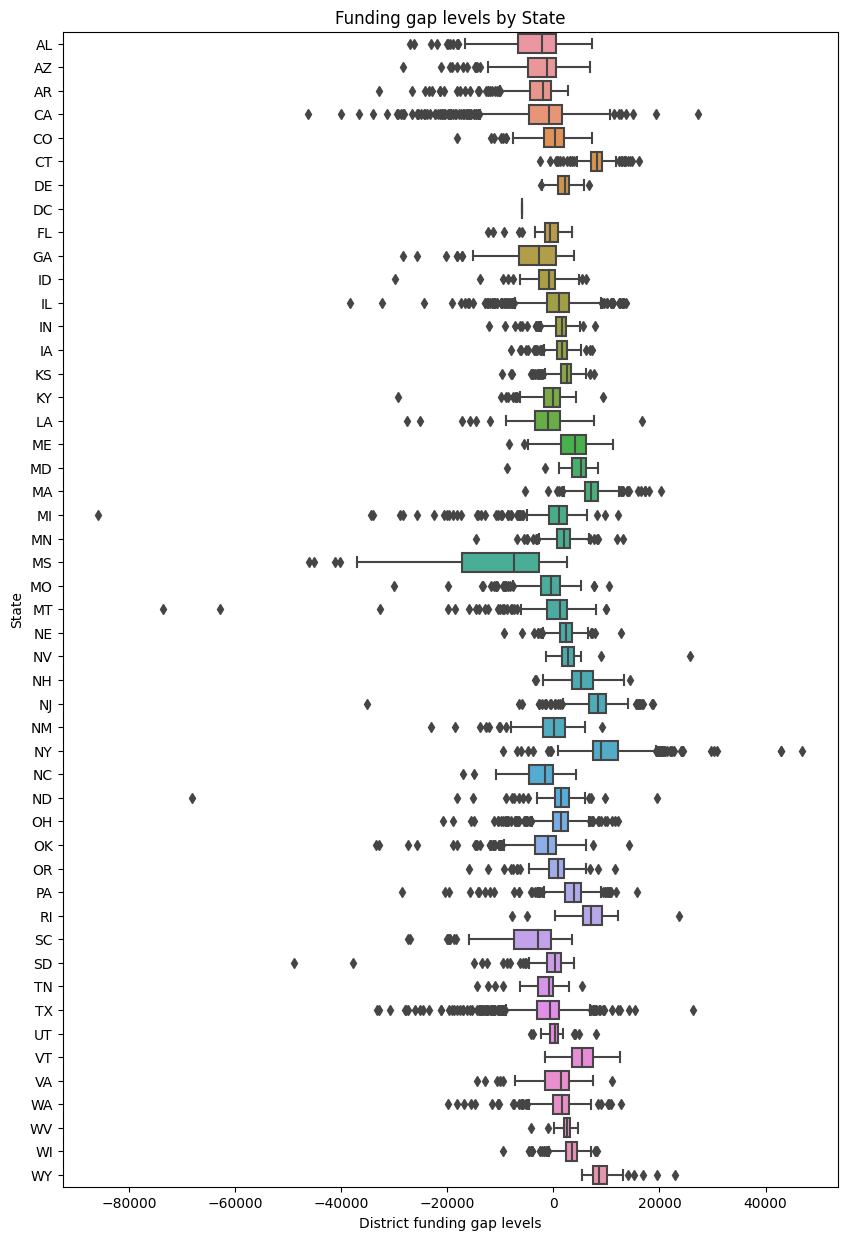

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a variable to filter the dataset by any year of interest
df_year = df[df['year'] == 2009]                    # Just like in section 1.3.1, you can use Boleans and comparison opperators to filter

# We specify a size for our figure, and then construct a boxplot. Here we are looking at the
plt.figure(figsize=(10, 15))                        # You can change the size
sns.boxplot(data=df_year, x="fundinggap", y="stabbr")     # You can change the values of x and/or y for variables that interest you

# Label our axes and title
plt.xlabel("District funding gap levels")
plt.ylabel("State")
plt.title("Funding gap levels by State")


#Print the plot
plt.show()

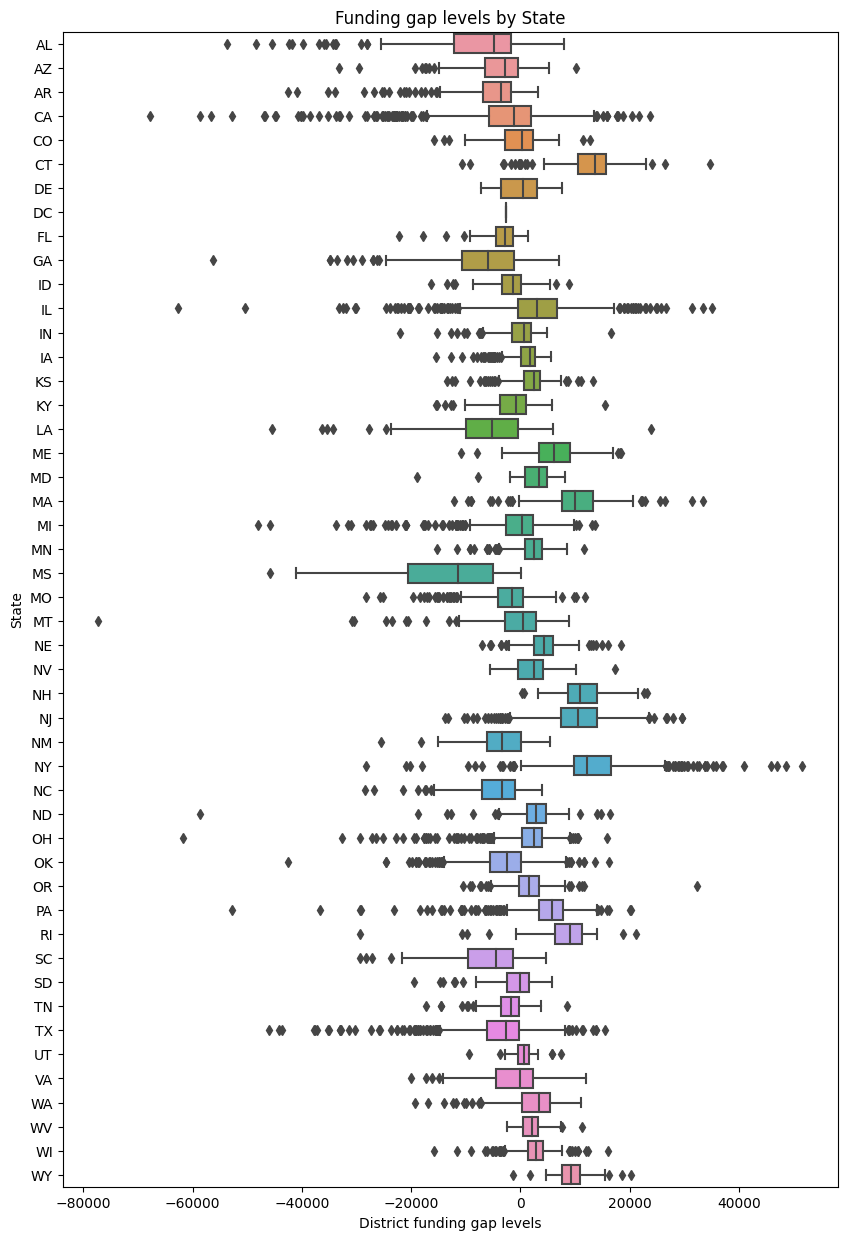

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a variable to filter the dataset by any year of interest
df_year = df[df['year'] == 2021]                    # Just like in section 1.3.1, you can use Boleans and comparison opperators to filter

# We specify a size for our figure, and then construct a boxplot. Here we are looking at the
plt.figure(figsize=(10, 15))                        # You can change the size
sns.boxplot(data=df_year, x="fundinggap", y="stabbr")     # You can change the values of x and/or y for variables that interest you

# Label our axes and title
plt.xlabel("District funding gap levels")
plt.ylabel("State")
plt.title("Funding gap levels by State")


#Print the plot
plt.show()

In [ ]:
#Add chart here to capture funding shifts over time

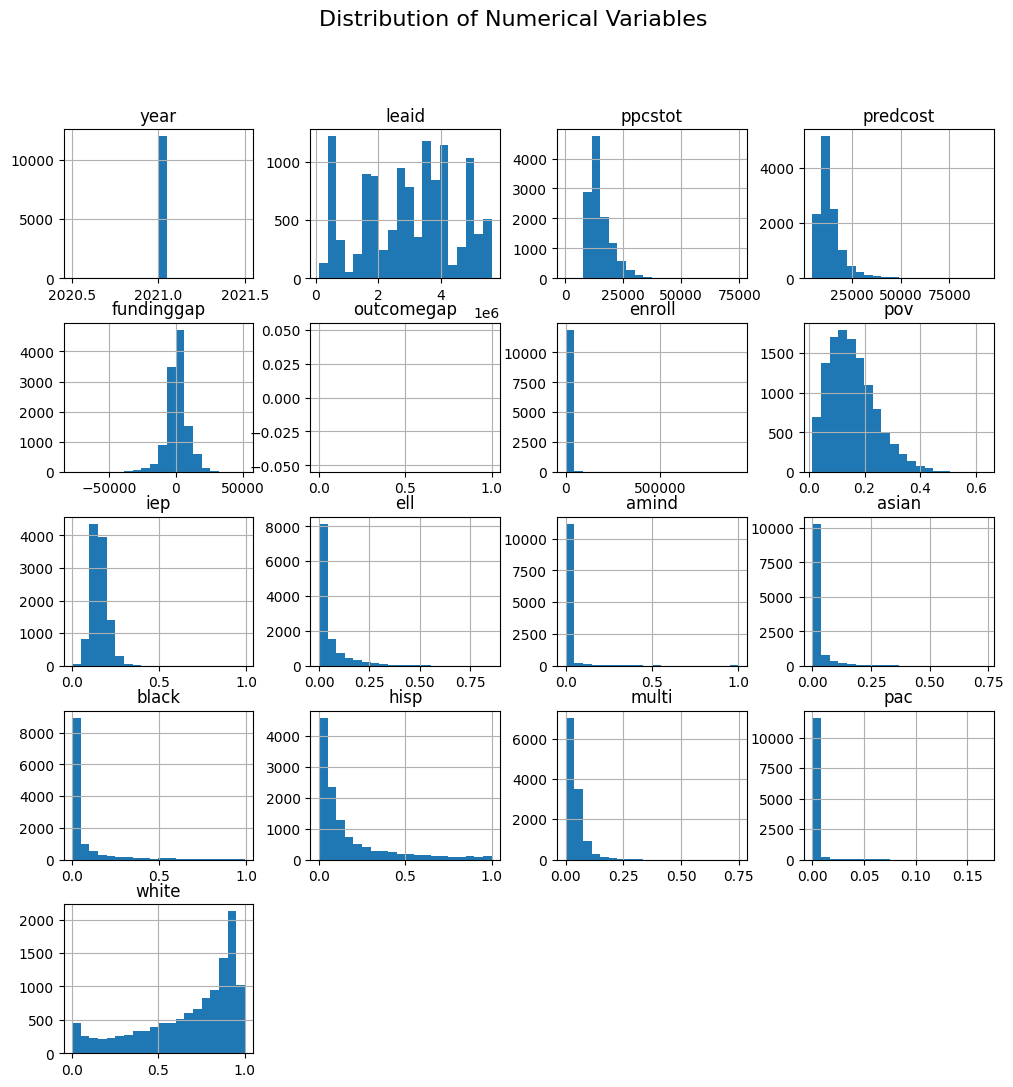

In [6]:
# Filter the dataframe for year 2021
df_hplot = df[df['year'] == 2021]  # This creates a filtered dataframe

# Create histograms for all numerical columns
df_hplot.hist(figsize=(12, 12), bins=20)

# Add title
plt.suptitle('Distribution of Numerical Variables', fontsize=16)

# Show the plot
plt.show()

In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoder= LabelEncoder()
df['RegionCode'] = label_encoder.fit_transform(df['Region'])
print(df.head())

   year   leaid          district state_name stabbr  ppcstot  predcost  \
0  2009  100005  ALBERTVILLE CITY    Alabama     AL     8608     12557   
1  2010  100005  ALBERTVILLE CITY    Alabama     AL     8688     12567   
2  2011  100005  ALBERTVILLE CITY    Alabama     AL     8492     11509   
3  2012  100005  ALBERTVILLE CITY    Alabama     AL     8157     15540   
4  2013  100005  ALBERTVILLE CITY    Alabama     AL     8069     14412   

   fundinggap  outcomegap  enroll  ...       ell     amind     asian  \
0       -3949   -0.373566    3849  ...  0.204729  0.001823  0.004427   
1       -3879   -0.216288    4104  ...  0.197856  0.001467  0.005136   
2       -3017   -0.190391    4143  ...  0.144340  0.000483  0.003138   
3       -7383   -0.117687    4140  ...  0.143720  0.001208  0.002657   
4       -6343   -0.278603    4422  ...  0.160271  0.001583  0.002714   

      black      hisp     multi       pac     white  Region  RegionCode  
0  0.022917  0.317188       NaN       NaN  0.653

In [26]:
df['Race_Ethn'] = label_encoder.fit_transform(df['Majority_Group'])
print(df.head())

   year   leaid          district state_name stabbr  ppcstot  predcost  \
0  2009  100005  ALBERTVILLE CITY    Alabama     AL     8608     12557   
1  2010  100005  ALBERTVILLE CITY    Alabama     AL     8688     12567   
2  2011  100005  ALBERTVILLE CITY    Alabama     AL     8492     11509   
3  2012  100005  ALBERTVILLE CITY    Alabama     AL     8157     15540   
4  2013  100005  ALBERTVILLE CITY    Alabama     AL     8069     14412   

   fundinggap  outcomegap  enroll  ...     black      hisp     multi  \
0       -3949   -0.373566    3849  ...  0.022917  0.317188       NaN   
1       -3879   -0.216288    4104  ...  0.022010  0.335534       NaN   
2       -3017   -0.190391    4143  ...  0.022930  0.351195  0.000965   
3       -7383   -0.117687    4140  ...  0.017874  0.349758  0.011836   
4       -6343   -0.278603    4422  ...  0.017413  0.378109  0.017187   

        pac     white  Region  RegionCode  cluster        Majority_Group  \
0       NaN  0.653646   South           2     

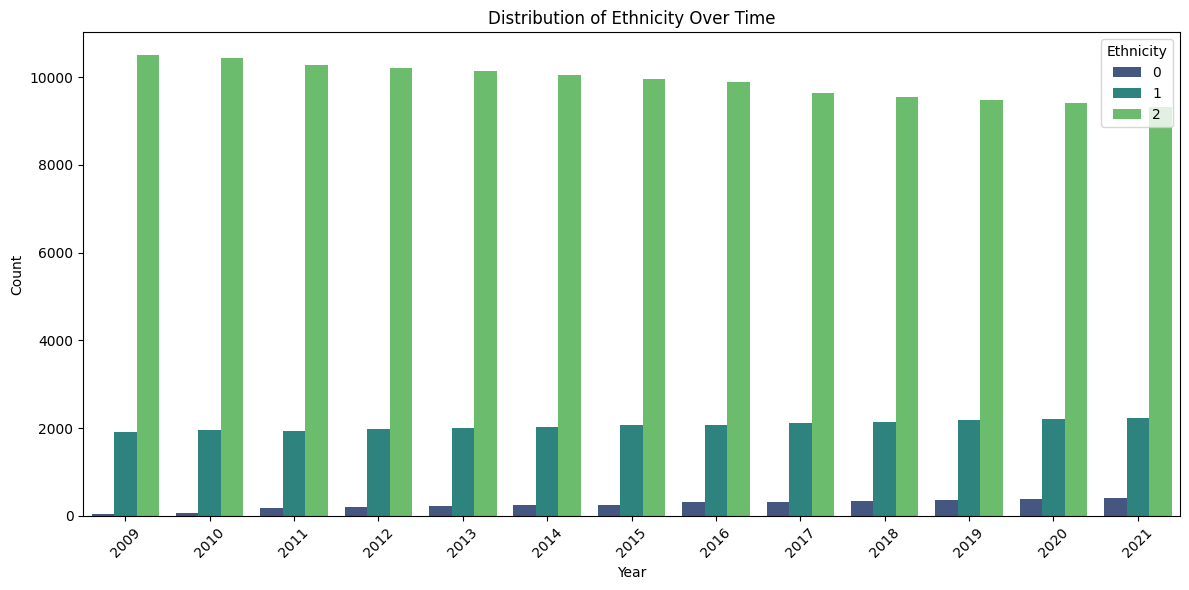

In [29]:
# Create a count plot for ethnicity over time using Seaborn
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='year', hue='Race_Ethn', palette='viridis')
plt.title('Distribution of Ethnicity Over Time')
plt.ylabel('Count')
plt.xlabel('Year')
plt.legend(title='Ethnicity')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

<Figure size 1200x600 with 0 Axes>

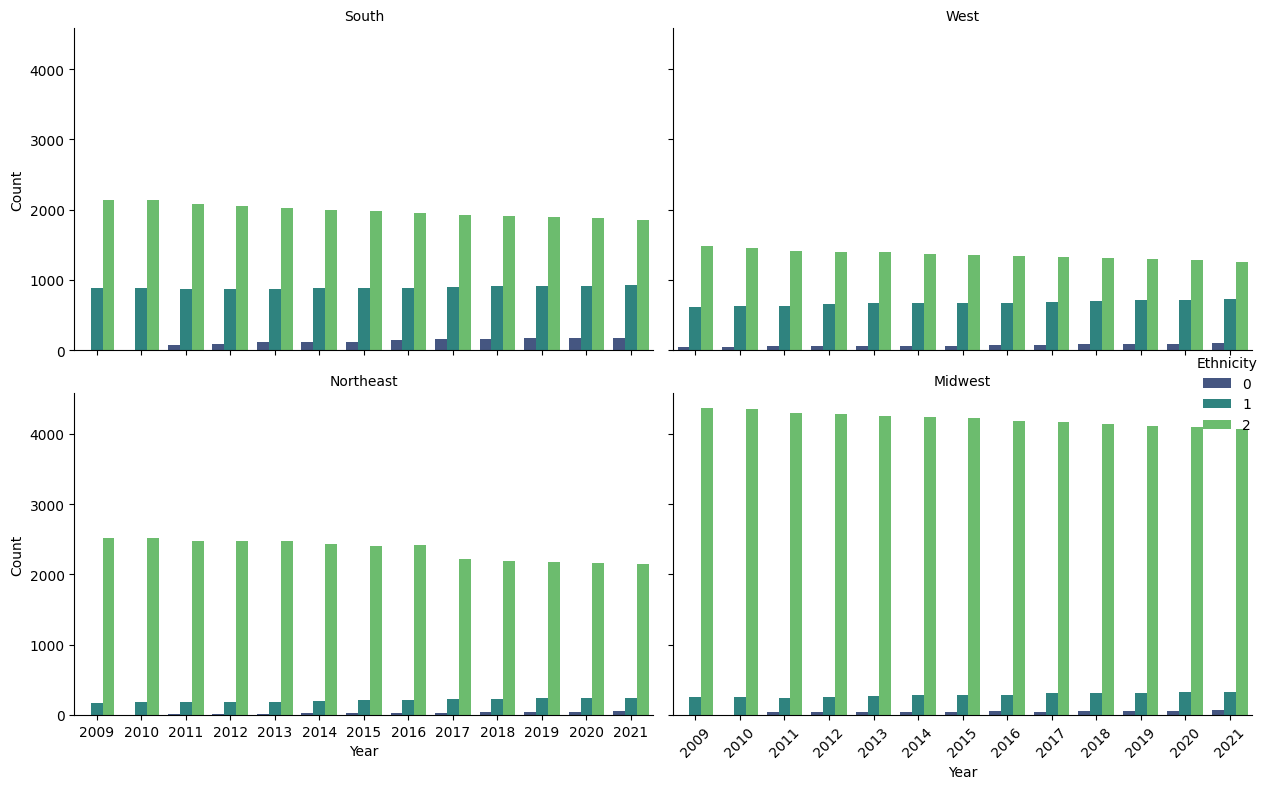

In [33]:
# Add Region as a facet
plt.figure(figsize=(12, 6))
g = sns.FacetGrid(df, col='Region', col_wrap=2, height=4, aspect=1.5)
g.map_dataframe(sns.countplot, x='year', hue='Race_Ethn', palette='viridis', dodge=True)
g.add_legend(title='Ethnicity')
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Year", "Count")

# Adjust layout for better visibility
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
#We begin by importing plotly.express as px
import plotly.express as px

#Ask Abi about this idea
# Create an interactive scatter plot
fig = px.scatter(df,
                 x="ppcstot",
                 y="RegionCode",
                 size="enroll",
                 size_max=70,
                 color="year",                  # Both the color and size of the bubblues will reference the total enrollment of each district
                 hover_name="Region")


# Customize and show the plot
fig.update_layout(title='Interactive Plot')
fig.show()

In [34]:
# Calculate mean funding level by state and year
mean_funding = df.groupby(['state_name', 'year'])['ppcstot'].mean().reset_index()

# Formatting the output nicely
mean_funding['ppcstot'] = mean_funding['ppcstot'].map('${:,.2f}'.format)  # Formatting as currency

# Display the results
print(mean_funding)


    state_name  year     ppcstot
0      Alabama  2009   $8,914.73
1      Alabama  2010   $8,962.11
2      Alabama  2011   $8,906.53
3      Alabama  2012   $8,689.65
4      Alabama  2013   $8,925.08
..         ...   ...         ...
627    Wyoming  2017  $19,290.70
628    Wyoming  2018  $18,840.68
629    Wyoming  2019  $19,099.26
630    Wyoming  2020  $19,897.04
631    Wyoming  2021  $20,824.43

[632 rows x 3 columns]


In [11]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [13]:
# Select relevant features 
features = df[['ppcstot', 'predcost', 'fundinggap', 'enroll', 'pov', 'asian', 'white']]
# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

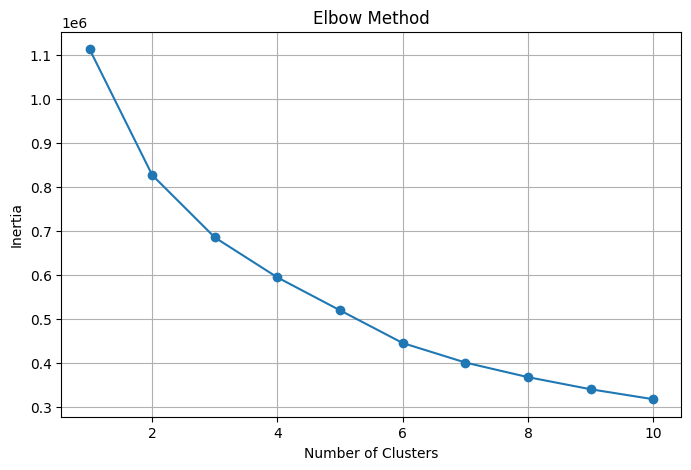

In [14]:
# Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

In [15]:
# Fit the K-Means model
optimal_clusters = 3  # Update based on your elbow method result
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


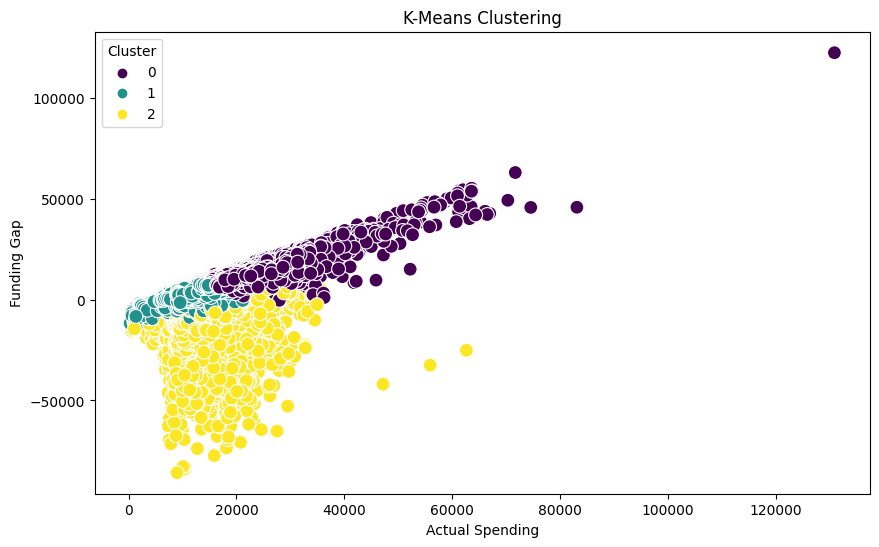

In [16]:
# Plotting the clusters (using two features for visualization)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['ppcstot'], y=df['fundinggap'], hue=df['cluster'], palette='viridis', s=100)
plt.title('K-Means Clustering')
plt.xlabel('Actual Spending')
plt.ylabel('Funding Gap')
plt.legend(title='Cluster')
plt.show()

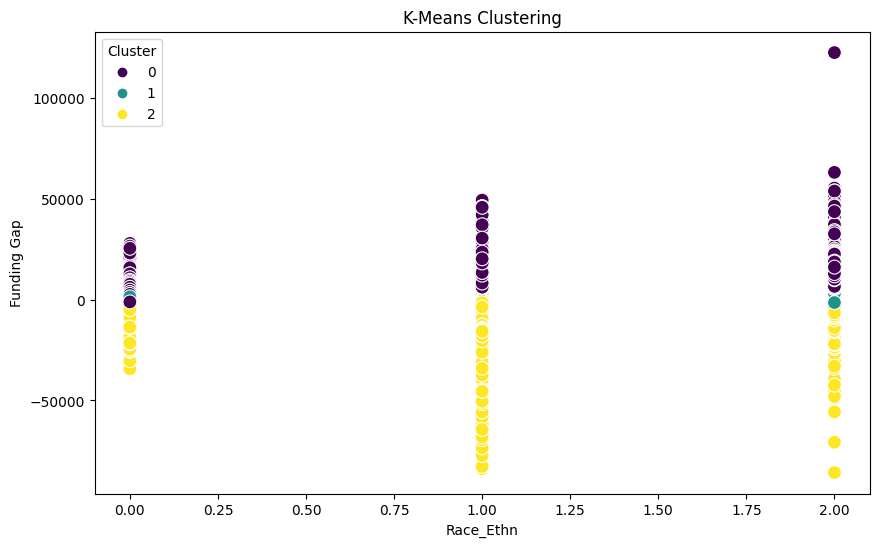

In [35]:
#Explore this idea with Abi
# Plotting the clusters (using two features for visualization)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Race_Ethn'], y=df['fundinggap'], hue=df['cluster'], palette='viridis', s=100)
plt.title('K-Means Clustering')
plt.xlabel('Race_Ethn')
plt.ylabel('Funding Gap')
plt.legend(title='Cluster')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

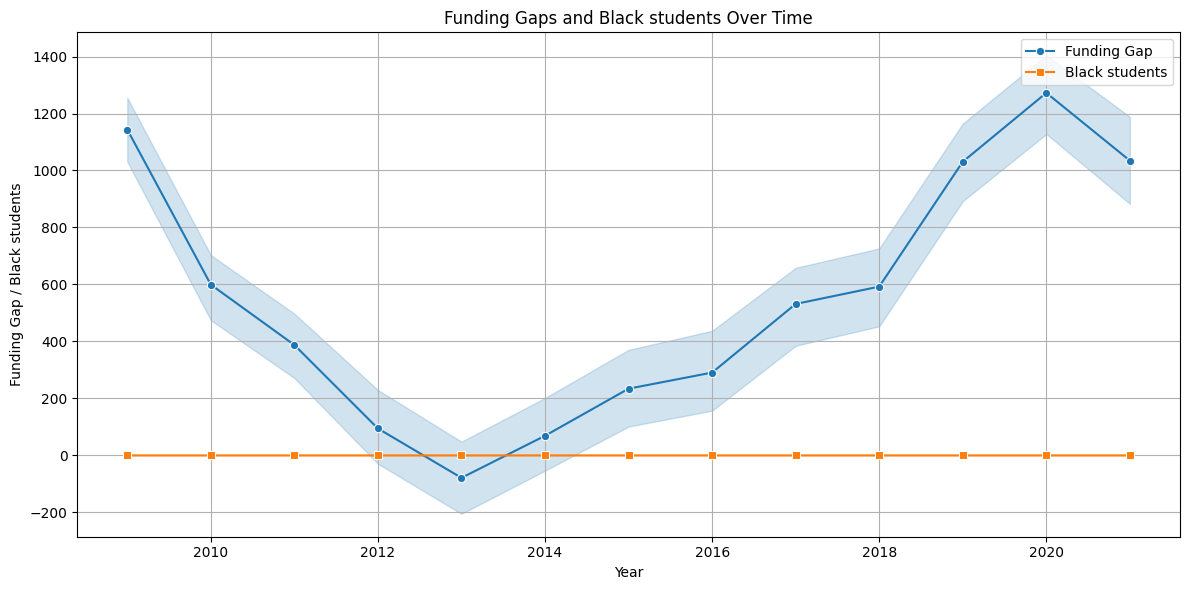

In [37]:
#Explore this idea with Abi
# Visualize Funding Gap vs. Percentage of Minority Students
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='year', y='fundinggap', label='Funding Gap', marker='o')
sns.lineplot(data=df, x='year', y='black', label='Black students', marker='s')
plt.title('Funding Gaps and Black students Over Time')
plt.ylabel('Funding Gap / Black students')
plt.xlabel('Year')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [19]:
def find_optimal_clusters(scaled_features, max_clusters=6):
    """
    Find the optimal number of clusters using the elbow method and silhouette score.
    
    Parameters:
    scaled_features (numpy.array): Scaled feature array
    max_clusters (int): Maximum number of clusters to try
    
    Returns:
    tuple: (inertias, silhouette_scores)
    """
    inertias = []
    silhouette_scores = []
    
    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(scaled_features)
        inertias.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))
        
    return inertias, silhouette_scores

In [20]:
def plot_clustering_metrics(inertias, silhouette_scores):
    """
    Plot the elbow curve and silhouette scores.
    
    Parameters:
    inertias (list): List of inertia values
    silhouette_scores (list): List of silhouette scores
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Plot elbow curve
    ax1.plot(range(2, len(inertias) + 2), inertias, marker='o')
    ax1.set_xlabel('Number of clusters (k)')
    ax1.set_ylabel('Inertia')
    ax1.set_title('Elbow Method')
    
    # Plot silhouette scores
    ax2.plot(range(2, len(silhouette_scores) + 2), silhouette_scores, marker='o')
    ax2.set_xlabel('Number of clusters (k)')
    ax2.set_ylabel('Silhouette Score')
    ax2.set_title('Silhouette Analysis')
    
    plt.tight_layout()
    plt.show()

In [21]:
def perform_clustering(scaled_features, n_clusters):
    """
    Perform K-means clustering with the specified number of clusters.
    
    Parameters:
    scaled_features (numpy.array): Scaled feature array
    n_clusters (int): Number of clusters to create
    
    Returns:
    tuple: (KMeans model, cluster labels)
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(scaled_features)
    return kmeans, labels

def analyze_clusters(df, feature_columns, labels, scaler):
    """
    Analyze the characteristics of each cluster.
    
    Parameters:
    df (pandas.DataFrame): Original dataframe
    feature_columns (list): List of feature columns used
    labels (numpy.array): Cluster labels
    scaler (StandardScaler): Fitted scaler object
    
    Returns:
    pandas.DataFrame: Cluster analysis results
    """
    # Add cluster labels to the original dataframe
    df_with_clusters = df.copy()
    df_with_clusters['Cluster'] = labels
    
    # Calculate cluster means
    cluster_means = df_with_clusters.groupby('Cluster')[feature_columns].mean()
    
    # Calculate cluster sizes
    cluster_sizes = df_with_clusters['Cluster'].value_counts().sort_index()
    
    return cluster_means, cluster_sizes

def plot_cluster_characteristics(cluster_means, feature_columns):
    """
    Create a heatmap of cluster characteristics.
    
    Parameters:
    cluster_means (pandas.DataFrame): Mean values for each cluster
    feature_columns (list): List of feature columns used
    """
    plt.figure(figsize=(12, 8))
    sns.heatmap(cluster_means, cmap='RdYlBu', center=0, annot=True, fmt='.2f')
    plt.title('Cluster Characteristics Heatmap')
    plt.show()

In [22]:
# View all data points in cluster 0
cluster_0 = df[df['cluster'] == 0]
print(cluster_0)

        year    leaid                           district state_name stabbr  \
1181    2021   102490                MOUNTAIN BROOK CITY    Alabama     AL   
1634    2019   103430                VESTAVIA HILLS CITY    Alabama     AL   
1635    2020   103430                VESTAVIA HILLS CITY    Alabama     AL   
1636    2021   103430                VESTAVIA HILLS CITY    Alabama     AL   
1948    2014   401260  BONITA ELEMENTARY DISTRICT (4224)    Arizona     AZ   
...      ...      ...                                ...        ...    ...   
159029  2017  5606090   WESTON COUNTY SCHOOL DISTRICT #7    Wyoming     WY   
159030  2018  5606090   WESTON COUNTY SCHOOL DISTRICT #7    Wyoming     WY   
159031  2019  5606090   WESTON COUNTY SCHOOL DISTRICT #7    Wyoming     WY   
159032  2020  5606090   WESTON COUNTY SCHOOL DISTRICT #7    Wyoming     WY   
159033  2021  5606090   WESTON COUNTY SCHOOL DISTRICT #7    Wyoming     WY   

        ppcstot  predcost  fundinggap  outcomegap  enroll  ... 